In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
raw_data = pd.read_csv("matches.csv")
raw_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
raw_data = raw_data.drop(["umpire3"], axis = 1)
raw_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             629 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           633 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  633 non-null    object
 14  venue            636 non-null    object
 15  umpire1          635 non-null    object
 16  umpire2          635 non-null    object
dtypes: int64(5), object(12)
memory usag

In [6]:
Team_Names = {'Sunrisers Hyderabad':"SRH", 'Rising Pune Supergiant':"RPS",
       'Kolkata Knight Riders':"KKR", 'Kings XI Punjab':"KXIP",
       'Royal Challengers Bangalore':"RCB", 'Mumbai Indians':"MI",
       'Delhi Daredevils':"DD", 'Gujarat Lions':"GL", 'Chennai Super Kings':"CSK",
       'Rajasthan Royals':"RR", 'Deccan Chargers':"DC", 'Pune Warriors':"PWI",
       'Kochi Tuskers Kerala':"KTK", 'Rising Pune Supergiants':"RPS"}
#Team_Names.keys()
raw_data = raw_data.replace(Team_Names.keys() , Team_Names.values())

In [7]:
#toss_stats = raw_data['toss_winner']
#toss_stats.head()
#toss_stats[['toss_winner']['winner']] = raw_data[['toss_winner']['winner']]
#toss_stats.head()
#type(toss_stats)

only_full_matches_data = raw_data[ raw_data["dl_applied"] == 0 ]

only_full_matches_data["dl_applied"].nunique()
only_full_matches_data = only_full_matches_data.drop(['dl_applied'], axis = 1)
only_full_matches_data.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [8]:
only_full_matches_data.info()
#test = only_full_matches_data.dropna(["city"], axis=1)
only_full_matches_data = only_full_matches_data.dropna(axis=0)
only_full_matches_data.set_index("id",inplace=True)
only_full_matches_data.info()
only_full_matches_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 635
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               620 non-null    int64 
 1   season           620 non-null    int64 
 2   city             613 non-null    object
 3   date             620 non-null    object
 4   team1            620 non-null    object
 5   team2            620 non-null    object
 6   toss_winner      620 non-null    object
 7   toss_decision    620 non-null    object
 8   result           620 non-null    object
 9   winner           617 non-null    object
 10  win_by_runs      620 non-null    int64 
 11  win_by_wickets   620 non-null    int64 
 12  player_of_match  617 non-null    object
 13  venue            620 non-null    object
 14  umpire1          619 non-null    object
 15  umpire2          619 non-null    object
dtypes: int64(4), object(12)
memory usage: 82.3+ KB
<class 'pandas.core.frame.DataFra

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
6,2017,Hyderabad,2017-04-09,GL,SRH,SRH,field,normal,SRH,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [9]:
test = only_full_matches_data.sort_values(by="win_by_runs", ascending = False)
test_2 = test[test["win_by_runs"]>80]
test_2
test_2["winner"].value_counts()

CSK     5
RCB     4
MI      3
RR      2
KKR     2
DD      1
DC      1
SRH     1
KXIP    1
Name: winner, dtype: int64

In [10]:
SRH_GL = only_full_matches_data[only_full_matches_data["team2"]=="SRH"]
SRH_GL

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,
6,2017,Hyderabad,2017-04-09,GL,SRH,SRH,field,normal,SRH,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
14,2017,Kolkata,2017-04-15,KKR,SRH,SRH,field,normal,KKR,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
43,2017,Hyderabad,2017-05-06,RPS,SRH,SRH,field,normal,RPS,12,0,JD Unadkat,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,AK Chaudhary
47,2017,Hyderabad,2017-05-08,MI,SRH,MI,bat,normal,SRH,0,7,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,M Erasmus
52,2017,Kanpur,2017-05-13,GL,SRH,SRH,field,normal,SRH,0,8,Mohammed Siraj,Green Park,AK Chaudhary,Nitin Menon
388,2013,Hyderabad,2013-04-07,RCB,SRH,RCB,bat,tie,SRH,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi
394,2013,Delhi,2013-04-12,DD,SRH,DD,bat,normal,SRH,0,3,A Mishra,Feroz Shah Kotla,Aleem Dar,Subroto Das
397,2013,Kolkata,2013-04-14,KKR,SRH,KKR,bat,normal,KKR,48,0,G Gambhir,Eden Gardens,M Erasmus,VA Kulkarni
405,2013,Hyderabad,2013-04-19,KXIP,SRH,KXIP,bat,normal,SRH,0,5,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",HDPK Dharmasena,CK Nandan



Biggest wins in terms of runs has been registered by Mumbai Indians - 146 runs.
Chennai Super Kings have 5 out of the top 20 biggest wins by runs, most for any team.
Royal Challengers Bangalore have 4.


In [11]:
gb = only_full_matches_data.groupby(['team1','team2'])
a = gb.get_group(("MI","CSK"))
b = gb.get_group(("CSK","MI"))
CSK_MI = pd.concat([a,b],axis = 0)

CSK_MI = CSK_MI.drop(["team1","team2","umpire1","umpire2","result"], axis = 1)



In [12]:
s = gb.groups.keys()
print(s)

dict_keys([('CSK', 'DC'), ('CSK', 'DD'), ('CSK', 'KKR'), ('CSK', 'KTK'), ('CSK', 'KXIP'), ('CSK', 'MI'), ('CSK', 'PWI'), ('CSK', 'RCB'), ('CSK', 'RR'), ('CSK', 'SRH'), ('DC', 'CSK'), ('DC', 'DD'), ('DC', 'KKR'), ('DC', 'KTK'), ('DC', 'KXIP'), ('DC', 'MI'), ('DC', 'PWI'), ('DC', 'RCB'), ('DC', 'RR'), ('DD', 'CSK'), ('DD', 'DC'), ('DD', 'KKR'), ('DD', 'KTK'), ('DD', 'KXIP'), ('DD', 'MI'), ('DD', 'PWI'), ('DD', 'RCB'), ('DD', 'RPS'), ('DD', 'RR'), ('DD', 'SRH'), ('GL', 'DD'), ('GL', 'KKR'), ('GL', 'MI'), ('GL', 'RCB'), ('GL', 'RPS'), ('GL', 'SRH'), ('KKR', 'CSK'), ('KKR', 'DC'), ('KKR', 'DD'), ('KKR', 'GL'), ('KKR', 'KXIP'), ('KKR', 'MI'), ('KKR', 'PWI'), ('KKR', 'RCB'), ('KKR', 'RPS'), ('KKR', 'RR'), ('KKR', 'SRH'), ('KTK', 'KKR'), ('KTK', 'KXIP'), ('KTK', 'PWI'), ('KTK', 'RCB'), ('KTK', 'RR'), ('KXIP', 'CSK'), ('KXIP', 'DC'), ('KXIP', 'DD'), ('KXIP', 'GL'), ('KXIP', 'KKR'), ('KXIP', 'MI'), ('KXIP', 'PWI'), ('KXIP', 'RCB'), ('KXIP', 'RPS'), ('KXIP', 'RR'), ('KXIP', 'SRH'), ('MI', 'CSK'),

In [13]:
head_to_head = [[]]
for i in range(len(head_to_head)):
    head_to_head.pop()
    
head_to_head

[]

In [14]:

'''for i in range(len(teams)):
    #team_1 = teams[i]
    for j in range(i+1,len(teams)):
        #team_2 = teams[j]
        head_to_head = "_".join([teams[i],teams[j]])
        
        a = gb.get_group((teams[i],teams[j]))
        b = gb.get_group((teams[j], teams[i]))
        head_to_head = pd.concat([a,b], axis = 0)
        head_to_head = head_to_head.drop(["team1","team2","umpire1","umpire2","result"], axis = 1)'''
# Creates a list of all teams which have played head to head in IPL
i = 0 
for key in gb.groups.keys():
    key = list(key)
    head_to_head.append(key)
    
    

In [15]:
import copy
head_to_heads = copy.deepcopy(head_to_head)

In [16]:
#Removes duplicates from the list
#For example, ['CSK',"MI"] and ["MI","CSK"] are two different values in the list


for i in range(len(head_to_heads)):
    team1 = head_to_heads[i][0]
    team2 = head_to_heads[i][1]
    for j in range(i):
        if head_to_heads[j][0] == team2 and head_to_heads[j][1] == team1:
            head_to_heads[i][0] = 'x'
            break
    



In [17]:
head_to_heads

[['CSK', 'DC'],
 ['CSK', 'DD'],
 ['CSK', 'KKR'],
 ['CSK', 'KTK'],
 ['CSK', 'KXIP'],
 ['CSK', 'MI'],
 ['CSK', 'PWI'],
 ['CSK', 'RCB'],
 ['CSK', 'RR'],
 ['CSK', 'SRH'],
 ['x', 'CSK'],
 ['DC', 'DD'],
 ['DC', 'KKR'],
 ['DC', 'KTK'],
 ['DC', 'KXIP'],
 ['DC', 'MI'],
 ['DC', 'PWI'],
 ['DC', 'RCB'],
 ['DC', 'RR'],
 ['x', 'CSK'],
 ['x', 'DC'],
 ['DD', 'KKR'],
 ['DD', 'KTK'],
 ['DD', 'KXIP'],
 ['DD', 'MI'],
 ['DD', 'PWI'],
 ['DD', 'RCB'],
 ['DD', 'RPS'],
 ['DD', 'RR'],
 ['DD', 'SRH'],
 ['GL', 'DD'],
 ['GL', 'KKR'],
 ['GL', 'MI'],
 ['GL', 'RCB'],
 ['GL', 'RPS'],
 ['GL', 'SRH'],
 ['x', 'CSK'],
 ['x', 'DC'],
 ['x', 'DD'],
 ['x', 'GL'],
 ['KKR', 'KXIP'],
 ['KKR', 'MI'],
 ['KKR', 'PWI'],
 ['KKR', 'RCB'],
 ['KKR', 'RPS'],
 ['KKR', 'RR'],
 ['KKR', 'SRH'],
 ['KTK', 'KKR'],
 ['KTK', 'KXIP'],
 ['KTK', 'PWI'],
 ['KTK', 'RCB'],
 ['KTK', 'RR'],
 ['x', 'CSK'],
 ['x', 'DC'],
 ['x', 'DD'],
 ['KXIP', 'GL'],
 ['x', 'KKR'],
 ['KXIP', 'MI'],
 ['KXIP', 'PWI'],
 ['KXIP', 'RCB'],
 ['KXIP', 'RPS'],
 ['KXIP', 'RR'],
 ['

In [21]:
i = 0
while i < len(head_to_heads):
    if head_to_heads[i][0] == 'x':
        head_to_heads.pop(i)
    i+=1
    
        

In [22]:
head_to_heads

[['CSK', 'DC'],
 ['CSK', 'DD'],
 ['CSK', 'KKR'],
 ['CSK', 'KTK'],
 ['CSK', 'KXIP'],
 ['CSK', 'MI'],
 ['CSK', 'PWI'],
 ['CSK', 'RCB'],
 ['CSK', 'RR'],
 ['CSK', 'SRH'],
 ['DC', 'DD'],
 ['DC', 'KKR'],
 ['DC', 'KTK'],
 ['DC', 'KXIP'],
 ['DC', 'MI'],
 ['DC', 'PWI'],
 ['DC', 'RCB'],
 ['DC', 'RR'],
 ['DD', 'KKR'],
 ['DD', 'KTK'],
 ['DD', 'KXIP'],
 ['DD', 'MI'],
 ['DD', 'PWI'],
 ['DD', 'RCB'],
 ['DD', 'RPS'],
 ['DD', 'RR'],
 ['DD', 'SRH'],
 ['GL', 'DD'],
 ['GL', 'KKR'],
 ['GL', 'MI'],
 ['GL', 'RCB'],
 ['GL', 'RPS'],
 ['GL', 'SRH'],
 ['KKR', 'KXIP'],
 ['KKR', 'MI'],
 ['KKR', 'PWI'],
 ['KKR', 'RCB'],
 ['KKR', 'RPS'],
 ['KKR', 'RR'],
 ['KKR', 'SRH'],
 ['KTK', 'KKR'],
 ['KTK', 'KXIP'],
 ['KTK', 'PWI'],
 ['KTK', 'RCB'],
 ['KTK', 'RR'],
 ['KXIP', 'GL'],
 ['KXIP', 'MI'],
 ['KXIP', 'PWI'],
 ['KXIP', 'RCB'],
 ['KXIP', 'RPS'],
 ['KXIP', 'RR'],
 ['KXIP', 'SRH'],
 ['MI', 'KTK'],
 ['MI', 'PWI'],
 ['MI', 'RCB'],
 ['MI', 'RPS'],
 ['MI', 'RR'],
 ['MI', 'SRH'],
 ['PWI', 'RCB'],
 ['PWI', 'RR'],
 ['RCB', 'RPS'],

In [23]:
#Creates a dictionary of dataframes where team names are the keys and the corresponding head to head matches data are the values 

frames = {}

for i in range(len(head_to_heads)):
    a = gb.get_group((head_to_heads[i][0],head_to_heads[i][1]))
    if [head_to_heads[i][1],head_to_heads[i][0]] in head_to_head:
        b = gb.get_group((head_to_heads[i][1],head_to_heads[i][0]))
        frames[head_to_heads[i][0] + "v" + head_to_heads[i][1]] = pd.concat([a,b],axis = 0)
        frames[head_to_heads[i][0] + "v" + head_to_heads[i][1]] = frames[head_to_heads[i][0] + "v" + head_to_heads[i][1]].drop(["team1","team2","umpire1","umpire2","result"], axis = 1)
    else:
        frames[head_to_heads[i][0] + "v" + head_to_heads[i][1]] = a
        #frames[head_to_heads[i][0] + "v" + head_to_heads[i][1]] = frames[head_to_heads[i][0] + "v" + head_to_heads[i][1]].drop(["team1","team2","umpire1","umpire2","result"], axis = 1)



In [24]:
frames["CSKvRCB"]

,season,city,date,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,
74,2008,Bangalore,2008-04-28,CSK,bat,CSK,13,0,MS Dhoni,M Chinnaswamy Stadium
122,2009,Port Elizabeth,2009-04-20,CSK,bat,CSK,92,0,M Muralitharan,St George's Park
159,2009,Durban,2009-05-14,CSK,bat,RCB,0,2,LRPL Taylor,Kingsmead
173,2009,Johannesburg,2009-05-23,RCB,field,RCB,0,6,MK Pandey,New Wanderers Stadium
248,2011,Chennai,2011-04-16,CSK,bat,CSK,21,0,MEK Hussey,"MA Chidambaram Stadium, Chepauk"
302,2011,Bangalore,2011-05-22,RCB,field,RCB,0,8,CH Gayle,M Chinnaswamy Stadium
307,2011,Chennai,2011-05-28,CSK,bat,CSK,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
499,2014,Ranchi,2014-05-18,CSK,bat,RCB,0,5,AB de Villiers,JSCA International Stadium Complex
538,2015,Bangalore,2015-04-22,RCB,field,CSK,27,0,SK Raina,M Chinnaswamy Stadium


In [25]:
CSK_MI.sort_index(inplace = True)
CSK_MI
CSK_MI["winner"].value_counts()
#MI_Wins = CSK_MI.groupby("winner").get_group("Mumbai Indians")
#MI_Wins


MI     12
CSK     9
Name: winner, dtype: int64

Mumbai Indians vs Chennai Super Kings
Matches - 21
MI - 12
CSK - 9

In [26]:
raw_data["result"].value_counts()
#raw_data = raw_data.drop([raw_data["result"]=="no result"], axis = 1)
only_full_matches_data["result"].value_counts()
#only_full_matches_data.set_index("id")


normal    602
tie         7
Name: result, dtype: int64

In [27]:
most_MoMs = only_full_matches_data["player_of_match"].value_counts()
most_MoMs = most_MoMs[:20]
most_MoMs

CH Gayle          16
AB de Villiers    15
YK Pathan         15
RG Sharma         14
DA Warner         14
SK Raina          14
G Gambhir         13
MS Dhoni          13
AM Rahane         12
MEK Hussey        12
DR Smith          11
V Sehwag          11
JH Kallis         10
SR Watson         10
A Mishra           9
SE Marsh           9
KA Pollard         9
V Kohli            9
SR Tendulkar       8
AC Gilchrist       7
Name: player_of_match, dtype: int64

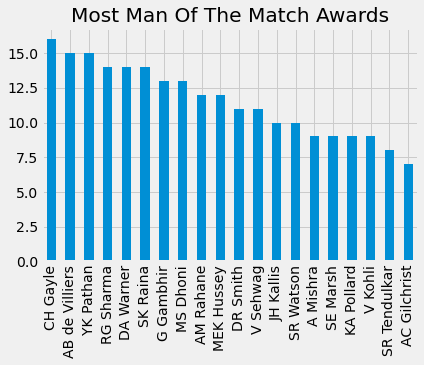

In [28]:
most_MoMs.plot.bar(title = "Most Man Of The Match Awards")

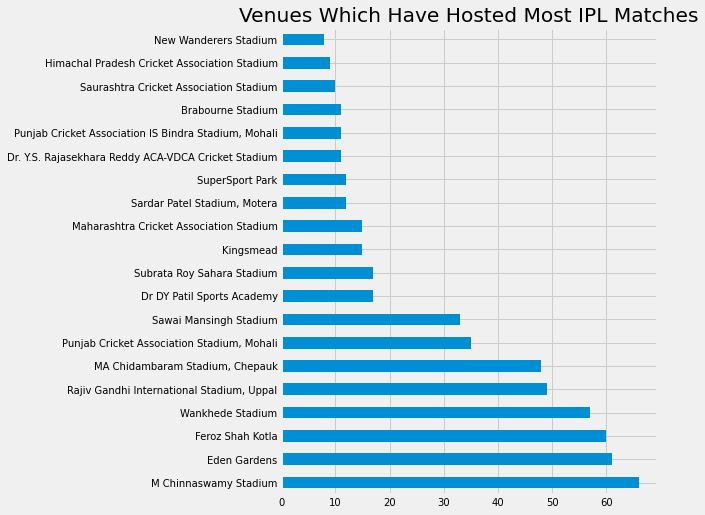

In [29]:
venues = raw_data["venue"].value_counts()
venues = venues[:20]
venues.plot.barh(figsize=(6,8), fontsize=10, title = "Venues Which Have Hosted Most IPL Matches")

In [30]:
umpires = pd.DataFrame()
umpires2 = pd.DataFrame()
umpires["no_of_matches"] = only_full_matches_data["umpire1"].value_counts()
umpires2["no_of_matches"] = only_full_matches_data["umpire2"].value_counts()
umpires2
umpires = pd.concat([umpires,umpires2], axis = 0)
umpires.sort_values(by="no_of_matches", ascending = False)
umpires.info()
top_umpires = umpires[:20]
top_umpires
umpires

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, HDPK Dharmasena to SJ Davis
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   no_of_matches  88 non-null     int64
dtypes: int64(1)
memory usage: 1.4+ KB


,no_of_matches
HDPK Dharmasena,70
Asad Rauf,49
AK Chaudhary,41
Aleem Dar,36
S Ravi,36
...,...
K Srinivasan,2
SD Fry,1
JD Cloete,1
Subroto Das,1


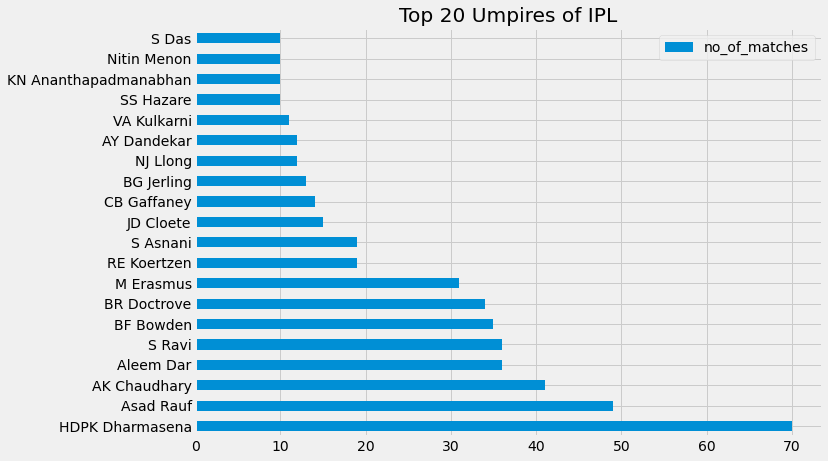

In [31]:
top_umpires.plot.barh(figsize = (10,7), title = "Top 20 Umpires of IPL")

In [32]:
ball_by_ball_data = pd.read_csv("deliveries.csv")

In [33]:
ball_by_ball_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [34]:
#Dropping non-required columns from dataframe

ball_by_ball_data_refined = ball_by_ball_data.drop(['is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs','player_dismissed',
       'dismissal_kind', 'fielder'], axis = 1)

In [35]:
ball_by_ball_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [36]:
ball_by_ball_data_refined.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,total_runs
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,2
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,1
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,1
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,4


In [37]:
#We want only first innings data
#Including only those entries to the dataset which correspond to the first innings of a match

first_innings_ball_by_ball_data_refined = ball_by_ball_data_refined[ball_by_ball_data_refined['inning'] == 1]
first_innings_ball_by_ball_data_refined.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,total_runs
150331,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,BCJ Cutting,B Kumar,SR Watson,6
150332,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,B Kumar,SR Watson,6
150333,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,BCJ Cutting,B Kumar,SR Watson,1
150334,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,B Kumar,BCJ Cutting,SR Watson,1
150335,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,6,BCJ Cutting,B Kumar,SR Watson,6


In [38]:
first_innings_ball_by_ball_data_refined['over'].value_counts()

1     4011
2     4009
3     3965
6     3959
4     3956
5     3952
7     3941
9     3918
8     3914
10    3908
13    3874
11    3873
15    3873
17    3872
12    3866
16    3863
14    3858
18    3858
19    3830
20    3729
Name: over, dtype: int64

In [39]:
#Grouping the dataframe in terms of separate matches.
#Each group is a dataframe consisting of data of first innings of one particular match

sep_matches = first_innings_ball_by_ball_data_refined.groupby(["match_id"])

In [40]:
#Iterating over each group,i.e., effectively iterating over each match.
#Grouping each match in terms of overs and balls to find out those matches where 20 overs have not been bowled.
#If (20,6) is not present in the groups obtained, it implies theinnings was over before the 6th ball of the 20th over.
#In that case, we are discarding those matches and only including matches where entire 20 overs have been bowled.

completed_first_innings_ball_by_ball_data_refined = pd.DataFrame()
for group in sep_matches.groups:
    a = sep_matches.get_group(group)
    if (20,6) in a.groupby(['over','ball']).groups.keys():
        completed_first_innings_ball_by_ball_data_refined = pd.concat([completed_first_innings_ball_by_ball_data_refined,a], axis = 0)
    

In [41]:
completed_first_innings_ball_by_ball_data_refined['over'].value_counts()

19    3687
1     3685
2     3676
20    3663
18    3662
17    3645
4     3637
3     3637
6     3632
5     3632
16    3617
15    3611
7     3607
13    3604
9     3601
14    3597
8     3596
10    3593
12    3583
11    3577
Name: over, dtype: int64

In [42]:
# To check if completed_first_innings_ball_by_ball_data_refined contains data of only
# those matches which have had complete 20 overs in the first innings


sep_overs_and_balls = completed_first_innings_ball_by_ball_data_refined.groupby(['match_id'])
for group in sep_overs_and_balls.groups:
    a = sep_overs_and_balls.get_group(group)
    if len(a)<120:
        print(len(a) + "Error")
    else:
        print(len(a))
        

125
125
122
125
124
120
128
123
125
126
130
124
124
126
127
126
126
122
125
123
123
127
121
127
124
121
122
125
123
122
122
123
129
125
122
123
120
124
123
124
128
122
123
126
126
124
129
124
125
127
125
122
125
124
124
122
123
122
122
127
126
124
124
126
125
125
123
125
122
122
127
126
126
125
124
124
126
122
131
124
123
124
128
127
124
125
127
128
124
125
122
124
121
121
127
122
122
126
127
126
123
122
124
121
122
124
127
121
121
126
123
125
126
128
127
124
122
123
126
123
123
126
124
124
125
123
122
124
124
124
124
125
130
125
122
127
126
121
124
130
126
124
127
122
124
126
124
129
123
123
122
131
121
125
123
126
127
129
125
122
131
125
130
121
127
125
121
123
124
121
122
126
124
127
130
127
130
127
122
129
124
127
124
124
126
124
122
124
127
123
128
126
126
130
121
123
126
128
124
125
126
123
126
125
126
121
123
121
122
127
123
124
121
121
124
125
123
124
124
122
123
125
128
126
121
122
126
122
123
128
128
129
126
122
123
123
129
124
125
126
124
121
125
124
122
124
121
125
126
122


In [43]:
total = []

for group in sep_matches.groups:
    a = sep_matches.get_group(group)
    total.append(a['total_runs'].sum())
    
len(total)

636

In [44]:
raw_data['First_Innings_Total'] = total

In [45]:
second_innings_ball_by_ball_data_refined = ball_by_ball_data_refined[ball_by_ball_data_refined['inning'] == 2]
second_innings_ball_by_ball_data_refined.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,total_runs
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,1
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,2
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,4


In [46]:
sep_matches_2nd = second_innings_ball_by_ball_data_refined.groupby(["match_id"])
total_2nd = []

for group in sep_matches_2nd.groups:
    a = sep_matches_2nd.get_group(group)
    total_2nd.append(a['total_runs'].sum())
    
len(total_2nd)

634

In [47]:
raw_data = raw_data[raw_data['result'] != 'no result']


In [48]:
total_2nd_new = total_2nd[:568] + total_2nd[569:]
len(total_2nd_new)

633

In [49]:
raw_data['Second_Innings_Total'] = total_2nd_new

In [50]:
raw_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,First_Innings_Total,Second_Innings_Total
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,207,172
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,184,187
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,183,184
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,163,164
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,157,142


In [51]:
raw_data["First_Innings_Total"].unique()

array([207, 184, 183, 163, 157, 135, 178, 148, 205, 158, 170, 142, 171,
       172, 188, 176, 161, 168, 159, 213, 191, 198, 187, 131, 160, 182,
       134, 153,  67, 209, 162, 185, 155, 208, 138, 212, 189, 167, 195,
       230, 154, 173,  73, 128, 107, 129, 222, 240, 165, 110, 166, 214,
       147, 137, 164, 196, 169, 109, 126, 144, 103, 140, 122, 181, 204,
       156, 143, 133, 221, 194, 118, 197, 149, 175, 211, 174, 145, 192,
       112, 104, 101, 179, 150, 139, 119, 141, 105, 116, 123, 120, 146,
       190, 203, 218,  92, 151, 136, 180, 177, 246, 200, 111, 130, 132,
        82,  95,  81, 231,  94, 114, 125,  89,  97, 232, 152, 193, 115,
       124, 100, 186, 215,  99, 117, 263,  80, 223, 106,  70, 201, 226,
       199, 127, 235, 113, 202, 121,  98, 227, 248, 206], dtype=int64)

In [52]:
#sep_overs = first_innings_ball_by_ball_data_refined.groupby(["over"])
over_by_over_runs_1st_innings = pd.DataFrame()
over_by_over_runs_1st_innings[['Id','Season','Winner','Won_by___wickets',
                  'Won_by___runs','Venue',
                  'First_Innings_Total','Second_Innings_Total']] = raw_data[['id','season','winner','win_by_wickets',
                                                                            'win_by_runs','venue',
                                                                           'First_Innings_Total','Second_Innings_Total']]
over_by_over_runs_1st_innings["Batting_Team"] = "---"
over_by_over_runs_1st_innings["Bowling_Team"] = "---"
for i in range(1,21):
    x = "PCT_Runs_in_over" + str(i)
    over_by_over_runs_1st_innings[x] = -1
    

#columns = 

for i in range(1,21):
    x = "Runs_in_over" + str(i)
    over_by_over_runs_1st_innings[x] = -1
                
                


In [53]:
over_by_over_runs_1st_innings.columns

Index(['Id', 'Season', 'Winner', 'Won_by___wickets', 'Won_by___runs', 'Venue',
       'First_Innings_Total', 'Second_Innings_Total', 'Batting_Team',
       'Bowling_Team', 'PCT_Runs_in_over1', 'PCT_Runs_in_over2',
       'PCT_Runs_in_over3', 'PCT_Runs_in_over4', 'PCT_Runs_in_over5',
       'PCT_Runs_in_over6', 'PCT_Runs_in_over7', 'PCT_Runs_in_over8',
       'PCT_Runs_in_over9', 'PCT_Runs_in_over10', 'PCT_Runs_in_over11',
       'PCT_Runs_in_over12', 'PCT_Runs_in_over13', 'PCT_Runs_in_over14',
       'PCT_Runs_in_over15', 'PCT_Runs_in_over16', 'PCT_Runs_in_over17',
       'PCT_Runs_in_over18', 'PCT_Runs_in_over19', 'PCT_Runs_in_over20',
       'Runs_in_over1', 'Runs_in_over2', 'Runs_in_over3', 'Runs_in_over4',
       'Runs_in_over5', 'Runs_in_over6', 'Runs_in_over7', 'Runs_in_over8',
       'Runs_in_over9', 'Runs_in_over10', 'Runs_in_over11', 'Runs_in_over12',
       'Runs_in_over13', 'Runs_in_over14', 'Runs_in_over15', 'Runs_in_over16',
       'Runs_in_over17', 'Runs_in_over18', 'Runs

In [54]:
for i in range(1,21):
    x = "'Runs_in_over" + str(i) + "'"
    print(x, end = ",")

'Runs_in_over1','Runs_in_over2','Runs_in_over3','Runs_in_over4','Runs_in_over5','Runs_in_over6','Runs_in_over7','Runs_in_over8','Runs_in_over9','Runs_in_over10','Runs_in_over11','Runs_in_over12','Runs_in_over13','Runs_in_over14','Runs_in_over15','Runs_in_over16','Runs_in_over17','Runs_in_over18','Runs_in_over19','Runs_in_over20',

In [55]:
columns = ['Id', 'Season', 'Venue', 'Batting_Team',
       'Bowling_Team', 'Runs_in_over1','Runs_in_over2','Runs_in_over3','Runs_in_over4',
       'Runs_in_over5','Runs_in_over6','Runs_in_over7','Runs_in_over8','Runs_in_over9',
       'Runs_in_over10','Runs_in_over11','Runs_in_over12','Runs_in_over13','Runs_in_over14',
       'Runs_in_over15','Runs_in_over16','Runs_in_over17','Runs_in_over18','Runs_in_over19',
       'Runs_in_over20','PCT_Runs_in_over1', 'PCT_Runs_in_over2',
       'PCT_Runs_in_over3', 'PCT_Runs_in_over4', 'PCT_Runs_in_over5',
       'PCT_Runs_in_over6', 'PCT_Runs_in_over7', 'PCT_Runs_in_over8',
       'PCT_Runs_in_over9', 'PCT_Runs_in_over10', 'PCT_Runs_in_over11',
       'PCT_Runs_in_over12', 'PCT_Runs_in_over13', 'PCT_Runs_in_over14',
       'PCT_Runs_in_over15', 'PCT_Runs_in_over16', 'PCT_Runs_in_over17',
       'PCT_Runs_in_over18', 'PCT_Runs_in_over19', 'PCT_Runs_in_over20',
       'First_Innings_Total', 'Second_Innings_Total','Winner', 'Won_by___wickets', 'Won_by___runs' ]

over_by_over_runs_1st_innings = over_by_over_runs_1st_innings[['Id', 'Season', 'Venue', 'Batting_Team',
       'Bowling_Team','Runs_in_over1','Runs_in_over2','Runs_in_over3','Runs_in_over4',
       'Runs_in_over5','Runs_in_over6','Runs_in_over7','Runs_in_over8','Runs_in_over9',
       'Runs_in_over10','Runs_in_over11','Runs_in_over12','Runs_in_over13','Runs_in_over14',
       'Runs_in_over15','Runs_in_over16','Runs_in_over17','Runs_in_over18','Runs_in_over19',
       'Runs_in_over20', 'PCT_Runs_in_over1', 'PCT_Runs_in_over2',
       'PCT_Runs_in_over3', 'PCT_Runs_in_over4', 'PCT_Runs_in_over5',
       'PCT_Runs_in_over6', 'PCT_Runs_in_over7', 'PCT_Runs_in_over8',
       'PCT_Runs_in_over9', 'PCT_Runs_in_over10', 'PCT_Runs_in_over11',
       'PCT_Runs_in_over12', 'PCT_Runs_in_over13', 'PCT_Runs_in_over14',
       'PCT_Runs_in_over15', 'PCT_Runs_in_over16', 'PCT_Runs_in_over17',
       'PCT_Runs_in_over18', 'PCT_Runs_in_over19', 'PCT_Runs_in_over20',
       'First_Innings_Total', 'Second_Innings_Total','Winner', 'Won_by___wickets', 'Won_by___runs']]

In [56]:
sep_overs.groups.keys()

NameError: name 'sep_overs' is not defined

In [57]:
over_by_over_runs_1st_innings.head()

,Id,Season,Venue,Batting_Team,Bowling_Team,Runs_in_over1,Runs_in_over2,Runs_in_over3,Runs_in_over4,Runs_in_over5,...,PCT_Runs_in_over16,PCT_Runs_in_over17,PCT_Runs_in_over18,PCT_Runs_in_over19,PCT_Runs_in_over20,First_Innings_Total,Second_Innings_Total,Winner,Won_by___wickets,Won_by___runs
0,1,2017,"Rajiv Gandhi International Stadium, Uppal",---,---,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,207,172,SRH,0,35
1,2,2017,Maharashtra Cricket Association Stadium,---,---,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,184,187,RPS,7,0
2,3,2017,Saurashtra Cricket Association Stadium,---,---,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,183,184,KKR,10,0
3,4,2017,Holkar Cricket Stadium,---,---,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,163,164,KXIP,6,0
4,5,2017,M Chinnaswamy Stadium,---,---,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,157,142,RCB,0,15


In [58]:


for group in sep_matches.groups:
    #print(group)
    if(group == 301 or group == 546 or group == 571):
        continue
    else:
        a = sep_matches.get_group(group)
        match_id = a['match_id'].unique()
        idx = match_id - 1
        total_runs = raw_data.loc[idx]["First_Innings_Total"]
        #print(total_runs)
        Batting_Team = a["batting_team"].unique()
        Bowling_Team = a["bowling_team"].unique()
        over_by_over_runs_1st_innings.loc[idx,"Batting_Team"] = Batting_Team
        over_by_over_runs_1st_innings.loc[idx,"Bowling_Team"] = Bowling_Team
        PCT_runs_in_over = [0]*20
        Runs_in_over = [0]*20
        sep_overs = a.groupby(['over'])
        for i in range (1,21):
            
            if i in sep_overs.groups.keys():
    
                b = sep_overs.get_group(i)
                runs_in_over = b['total_runs'].sum()
                PCT_runs_in_over[i-1] = round((runs_in_over/total_runs)*100, 2)
                Runs_in_over[i-1] = runs_in_over 
                #print(PCT_runs_in_over[i-1])
                #break
                y = "PCT_Runs_in_over" + str(i)
                z = "Runs_in_over" + str(i)
                over_by_over_runs_1st_innings.loc[idx,y] = PCT_runs_in_over[i-1]
                over_by_over_runs_1st_innings.loc[idx,z] = Runs_in_over[i-1]

In [59]:
over_by_over_runs_1st_innings.head()

,Id,Season,Venue,Batting_Team,Bowling_Team,Runs_in_over1,Runs_in_over2,Runs_in_over3,Runs_in_over4,Runs_in_over5,...,PCT_Runs_in_over16,PCT_Runs_in_over17,PCT_Runs_in_over18,PCT_Runs_in_over19,PCT_Runs_in_over20,First_Innings_Total,Second_Innings_Total,Winner,Won_by___wickets,Won_by___runs
0,1,2017,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,7,16,6,4,9,...,1.93,3.38,8.21,5.80,7.73,207,172,SRH,0,35
1,2,2017,Maharashtra Cricket Association Stadium,Mumbai Indians,Rising Pune Supergiant,11,8,9,13,7,...,3.80,5.43,4.35,4.89,16.30,184,187,RPS,7,0
2,3,2017,Saurashtra Cricket Association Stadium,Gujarat Lions,Kolkata Knight Riders,8,8,6,7,11,...,2.73,6.01,6.56,8.74,7.65,183,184,KKR,10,0
3,4,2017,Holkar Cricket Stadium,Rising Pune Supergiant,Kings XI Punjab,1,2,4,13,12,...,9.20,3.07,3.07,8.59,9.82,163,164,KXIP,6,0
4,5,2017,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,10,9,7,4,2,...,8.28,5.10,1.27,3.82,4.46,157,142,RCB,0,15


In [60]:
sep_matches_2nd.groups.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [61]:
#sep_overs = first_innings_ball_by_ball_data_refined.groupby(["over"])
over_by_over_runs_2nd_innings = pd.DataFrame()
over_by_over_runs_2nd_innings[['Id','Season','Winner','Won_by___wickets',
                  'Won_by___runs','Venue',
                  'First_Innings_Total','Second_Innings_Total']] = raw_data[['id','season','winner','win_by_wickets',
                                                                            'win_by_runs','venue',
                                                                           'First_Innings_Total','Second_Innings_Total']]
over_by_over_runs_2nd_innings["Batting_Team"] = "---"
over_by_over_runs_2nd_innings["Bowling_Team"] = "---"
for i in range(1,21):
    x = "PCT_Runs_in_over" + str(i)
    over_by_over_runs_2nd_innings[x] = -1
    

#columns = 

for i in range(1,21):
    x = "Runs_in_over" + str(i)
    over_by_over_runs_2nd_innings[x] = -1
                

                
                
columns = ['Id', 'Season', 'Venue', 'Batting_Team',
       'Bowling_Team','Runs_in_over1','Runs_in_over2','Runs_in_over3','Runs_in_over4',
       'Runs_in_over5','Runs_in_over6','Runs_in_over7','Runs_in_over8','Runs_in_over9',
       'Runs_in_over10','Runs_in_over11','Runs_in_over12','Runs_in_over13','Runs_in_over14',
       'Runs_in_over15','Runs_in_over16','Runs_in_over17','Runs_in_over18','Runs_in_over19',
       'Runs_in_over20', 'PCT_Runs_in_over1', 'PCT_Runs_in_over2',
       'PCT_Runs_in_over3', 'PCT_Runs_in_over4', 'PCT_Runs_in_over5',
       'PCT_Runs_in_over6', 'PCT_Runs_in_over7', 'PCT_Runs_in_over8',
       'PCT_Runs_in_over9', 'PCT_Runs_in_over10', 'PCT_Runs_in_over11',
       'PCT_Runs_in_over12', 'PCT_Runs_in_over13', 'PCT_Runs_in_over14',
       'PCT_Runs_in_over15', 'PCT_Runs_in_over16', 'PCT_Runs_in_over17',
       'PCT_Runs_in_over18', 'PCT_Runs_in_over19', 'PCT_Runs_in_over20',
       'First_Innings_Total', 'Second_Innings_Total','Winner', 'Won_by___wickets', 'Won_by___runs' ]

over_by_over_runs_2nd_innings = over_by_over_runs_2nd_innings[['Id', 'Season', 'Venue', 'Batting_Team',
       'Bowling_Team', 'Runs_in_over1','Runs_in_over2','Runs_in_over3','Runs_in_over4',
       'Runs_in_over5','Runs_in_over6','Runs_in_over7','Runs_in_over8','Runs_in_over9',
       'Runs_in_over10','Runs_in_over11','Runs_in_over12','Runs_in_over13','Runs_in_over14',
       'Runs_in_over15','Runs_in_over16','Runs_in_over17','Runs_in_over18','Runs_in_over19',
       'Runs_in_over20','PCT_Runs_in_over1', 'PCT_Runs_in_over2',
       'PCT_Runs_in_over3', 'PCT_Runs_in_over4', 'PCT_Runs_in_over5',
       'PCT_Runs_in_over6', 'PCT_Runs_in_over7', 'PCT_Runs_in_over8',
       'PCT_Runs_in_over9', 'PCT_Runs_in_over10', 'PCT_Runs_in_over11',
       'PCT_Runs_in_over12', 'PCT_Runs_in_over13', 'PCT_Runs_in_over14',
       'PCT_Runs_in_over15', 'PCT_Runs_in_over16', 'PCT_Runs_in_over17',
       'PCT_Runs_in_over18', 'PCT_Runs_in_over19', 'PCT_Runs_in_over20',
       'First_Innings_Total', 'Second_Innings_Total','Winner', 'Won_by___wickets', 'Won_by___runs']]





for group in sep_matches_2nd.groups:
    #print(group)
    if(group == 571):
        continue
    else:
        a = sep_matches_2nd.get_group(group)
        match_id = a['match_id'].unique()
        idx = match_id - 1
        total_runs = raw_data.loc[idx]["First_Innings_Total"]
        #print(total_runs)
        Batting_Team = a["batting_team"].unique()
        Bowling_Team = a["bowling_team"].unique()
        over_by_over_runs_2nd_innings.loc[idx,"Batting_Team"] = Batting_Team
        over_by_over_runs_2nd_innings.loc[idx,"Bowling_Team"] = Bowling_Team
        PCT_runs_in_over = [0]*20
        Runs_in_over = [0]*20
        sep_overs = a.groupby(['over'])
        for i in range (1,21):
            
            if i in sep_overs.groups.keys():
    
                b = sep_overs.get_group(i)
                runs_in_over = b['total_runs'].sum()
                PCT_runs_in_over[i-1] = round((runs_in_over/total_runs)*100, 2)
                Runs_in_over[i-1] = runs_in_over                 
                #print(PCT_runs_in_over[i-1])
                #break
                y = "PCT_Runs_in_over" + str(i)
                z = "Runs_in_over" + str(i)
                over_by_over_runs_2nd_innings.loc[idx,y] = PCT_runs_in_over[i-1]
                over_by_over_runs_2nd_innings.loc[idx,z] = Runs_in_over[i-1]

In [62]:
over_by_over_runs_2nd_innings.head()

,Id,Season,Venue,Batting_Team,Bowling_Team,Runs_in_over1,Runs_in_over2,Runs_in_over3,Runs_in_over4,Runs_in_over5,...,PCT_Runs_in_over16,PCT_Runs_in_over17,PCT_Runs_in_over18,PCT_Runs_in_over19,PCT_Runs_in_over20,First_Innings_Total,Second_Innings_Total,Winner,Won_by___wickets,Won_by___runs
0,1,2017,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,Sunrisers Hyderabad,11,1,16,15,5,...,5.80,1.45,0.97,4.35,3.38,207,172,SRH,0,35
1,2,2017,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,Mumbai Indians,8,15,12,4,4,...,4.89,5.43,3.80,3.80,8.15,184,187,RPS,7,0
2,3,2017,Saurashtra Cricket Association Stadium,Kolkata Knight Riders,Gujarat Lions,7,13,17,9,7,...,-1.00,-1.00,-1.00,-1.00,-1.00,183,184,KKR,10,0
3,4,2017,Holkar Cricket Stadium,Kings XI Punjab,Rising Pune Supergiant,6,13,8,11,10,...,9.20,1.23,7.36,4.29,-1.00,163,164,KXIP,6,0
4,5,2017,M Chinnaswamy Stadium,Delhi Daredevils,Royal Challengers Bangalore,9,4,8,11,5,...,5.10,3.18,7.01,1.27,1.91,157,142,RCB,0,15


In [63]:
over_by_over_runs_2nd_innings["Venue"][0]

'Rajiv Gandhi International Stadium, Uppal'

In [64]:
def Over_by_Over_PCT_Runs_Breakdown(over_by_over_runs):
    over_by_over_PCT_Runs_breakdown = pd.DataFrame(columns = ["Over","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"], index = range(0,20))
 

    for i in range(1,21):
        x = "PCT_Runs_in_over" + str(i)
        j = i-1
        over_by_over_PCT_Runs_breakdown["Over"][j] = x 

    years = over_by_over_runs.groupby(['Season'])

    for group in years.groups:
        c = years.get_group(group)
        for r in range(25,45):
            total_pct = 0
            total_matches = 0
            for j in range(len(c)):
                if c.iloc[j,r] != -1:
                    total_pct = total_pct + c.iloc[j,r]
                    total_matches = total_matches + 1
            avg = round(total_pct/total_matches, 2)
            k = r - 25
            over_by_over_PCT_Runs_breakdown.loc[k,str(group)] = avg
    
    
    over_by_over_PCT_Runs_breakdown = over_by_over_PCT_Runs_breakdown.set_index(['Over'])

    return over_by_over_PCT_Runs_breakdown


over_by_over_PCT_Runs_breakdown_1st_inngs = Over_by_Over_PCT_Runs_Breakdown(over_by_over_runs_1st_innings)
over_by_over_PCT_Runs_breakdown_2nd_inngs = Over_by_Over_PCT_Runs_Breakdown(over_by_over_runs_2nd_innings)

over_by_over_PCT_Runs_breakdown_1st_inngs.head()


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Over,,,,,,,,,,
PCT_Runs_in_over1,3.41,3.75,4,4.21,3.25,3.28,4.09,3.73,3.5,3.69
PCT_Runs_in_over2,5.09,4.75,5.25,4.12,3.88,4.2,3.59,4.57,4.14,4.42
PCT_Runs_in_over3,4.27,4.89,4.98,5.06,4.92,4.93,4.55,5.45,4.05,5.61
PCT_Runs_in_over4,4.74,5.01,4.65,4.22,5.09,4.13,4.9,5.27,5.25,4.87
PCT_Runs_in_over5,5.4,5.46,5.04,4.73,4.95,5.23,5.13,4.98,5.3,4.9


In [65]:
def Over_by_Over_Runs_breakdown(over_by_over_runs):
    over_by_over_Runs_breakdown = pd.DataFrame(columns = ["Over","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"], index = range(0,20))
 

    for i in range(1,21):
        x = "Runs_in_over" + str(i)
        j = i-1
        over_by_over_Runs_breakdown["Over"][j] = x 

    years = over_by_over_runs.groupby(['Season'])

    for group in years.groups:
        c = years.get_group(group)
        for r in range(5,25):
            total_runs = 0
            total_matches = 0
            for j in range(len(c)):
                if c.iloc[j,r] != -1:
                    total_runs = total_runs + c.iloc[j,r]
                    total_matches = total_matches + 1
            avg = round(total_runs/total_matches, 2)
            k = r - 5
            over_by_over_Runs_breakdown.loc[k,str(group)] = avg
    
    over_by_over_Runs_breakdown = over_by_over_Runs_breakdown.set_index(['Over'])
    
    return over_by_over_Runs_breakdown


over_by_over_Runs_breakdown_1st_inngs = Over_by_Over_Runs_breakdown(over_by_over_runs_1st_innings)
over_by_over_Runs_breakdown_2nd_inngs = Over_by_Over_Runs_breakdown(over_by_over_runs_2nd_innings)

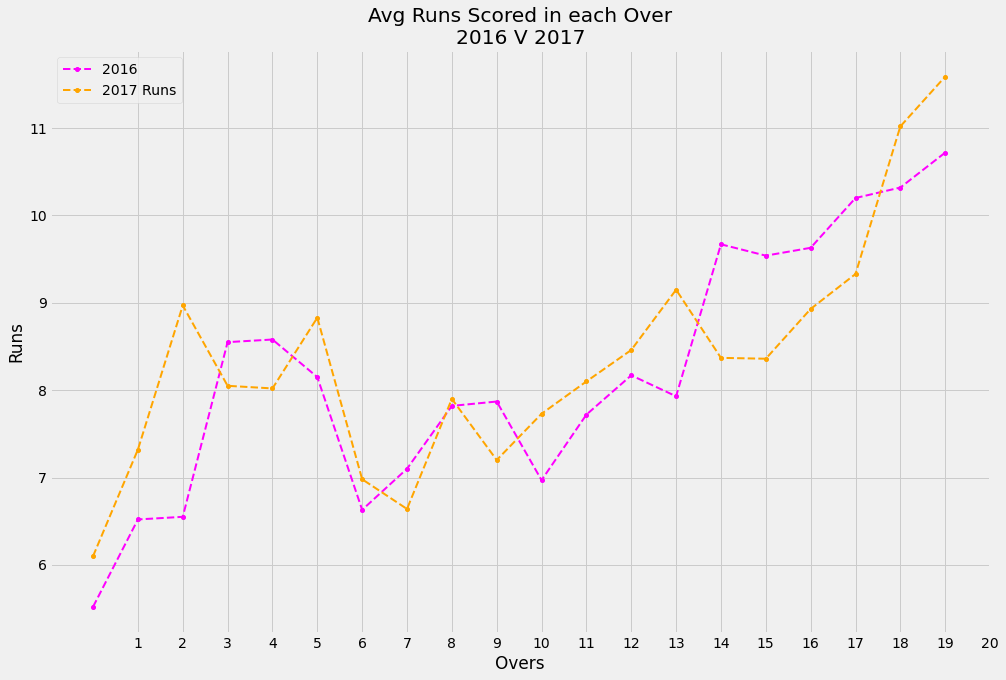

In [67]:
x = []
for i in range(2008,2018):
    x.append(over_by_over_Runs_breakdown_1st_inngs[str(i)])
mlt.figure(figsize=(15,10))

#mlt.plot(x[0], label = "2008", color='orange', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(x[1], label = "2009", color='red', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(x[2], label = "2010", color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(x[3], label = "2011", color='green', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(x[4], label = "2012", color='black', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(x[5], label = "2013", color='cyan', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(x[6], label = "2014", color='pink', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(x[7], label = "2015", color='yellow', marker='o', linestyle='dashed', linewidth=2, markersize=4)
mlt.plot(x[8], label = "2016", color='magenta', marker='o', linestyle='dashed', linewidth=2, markersize=4)
mlt.plot(x[9], label = "2017 Runs", color='orange', marker='o', linestyle='dashed', linewidth=2, markersize=4)


y = []
for i in range(2008,2018):
    y.append(over_by_over_PCT_Runs_breakdown_1st_inngs[str(i)])
#mlt.figure(figsize=(15,10))
x = x[:10]
#mlt.plot(y[0], label = "2008", color='orange', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(y[1], label = "2009", color='red', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(y[2], label = "2010", color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(y[3], label = "2011", color='green', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(y[4], label = "2012", color='black', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(y[5], label = "2013", color='cyan', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(y[6], label = "2014", color='pink', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(y[7], label = "2015", color='yellow', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(y[8], label = "2016", color='magenta', marker='o', linestyle='dashed', linewidth=2, markersize=4)
#mlt.plot(y[9], label = "2017 PCT Runs", color='brown', marker='o', linestyle='dashed', linewidth=2, markersize=4)


#Overs = [_ for _ in range(1,21)]
a = [_ for _ in range(1,21)]
mlt.xticks(a , a)
mlt.xlabel("Overs")
mlt.ylabel("Runs")
mlt.title("Avg Runs Scored in each Over\n2016 V 2017")
mlt.legend()
mlt.show()

In [ ]:
help(mlt.plot)

In [ ]:
print('Toss Decisions in %\n',((raw_data['toss_decision']).value_counts())/636*100)

In [ ]:
mlt.subplots(figsize=(12,6))
sns.countplot(x='season',hue='toss_decision',data=raw_data, palette='Set1_r')
mlt.show()

In [ ]:
mlt.subplots(figsize=(13,6))
ax=raw_data['toss_winner'].value_counts().plot.bar(width=0.8,color=sns.color_palette('RdYlGn',5))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+2))
mlt.show()